<a href="https://colab.research.google.com/github/LyanhVini/Analysis-of-Anthropic-Indicators-in-Amazonian-Communities-/blob/main/Decision%20Trees/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html
- https://towardsdatascience.com/a-visual-guide-to-gradient-boosted-trees-8d9ed578b33

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Árvores/Comunidadesv4.xlsx").filter(["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09", "P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "perfil"])
eixo_1 = eixo_1.loc[0:103].reset_index(drop=True)
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfil
0,5,5,5,3,5,3,3,3,2,4,...,2,2,2,2,5,5,3,3,3,quilombola
1,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,quilombola
2,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,quilombola
3,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,quilombola
4,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,indigena
100,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,indigena
101,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,indigena
102,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,indigena


In [ ]:
eixo_1.replace('X', pd.NA, inplace=True)
#eixo_1.replace('x', pd.NA, inplace=True)
eixo_1.dropna(inplace=True)
eixo_1 = eixo_1.reset_index()
eixo_1 = eixo_1.drop('index', axis=1)
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfil
0,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,quilombola
1,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,quilombola
2,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,quilombola
3,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,quilombola
4,4,4,3,3,4,5,4,5,3,3,...,3,2,2,2,3,4,3,2,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,indigena
90,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,indigena
91,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,indigena
92,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,indigena


In [ ]:
X = eixo_1.drop("perfil", axis=1)
y = eixo_1["perfil"]

In [ ]:
y.unique()

array(['quilombola', 'indigena', 'pescador', 'urbano'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0])

In [ ]:
i=0
j=0
for i in y:
  if i == 3:
    j = j + 1
print(j)


24


In [ ]:
for column in X.columns:
    # Verifique se o tipo de dado da coluna é um objeto (categórico)
    if X[column].dtype == 'object':
        # Aplique o Label Encoder a essa coluna
        X[column] = label_encoder.fit_transform(X[column])

In [ ]:
X

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25
0,4,4,2,2,2,2,4,4,2,2,...,2,1,1,3,2,2,2,2,2,2
1,4,4,4,3,4,3,4,4,1,2,...,3,2,4,4,3,2,4,4,2,2
2,3,4,3,2,3,3,4,3,2,3,...,1,0,1,1,2,4,3,2,2,3
3,4,4,2,2,4,3,4,4,2,3,...,2,0,0,2,2,4,4,2,2,2
4,3,3,2,2,3,3,3,4,2,2,...,2,2,1,1,1,2,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,4,4,3,4,4,3,3,3,3,4,...,3,3,2,4,3,4,4,3,3,4
90,4,4,4,4,4,3,4,3,3,4,...,3,3,3,4,3,4,4,4,3,4
91,4,4,3,4,4,3,4,4,2,4,...,3,3,2,3,3,4,4,4,2,4
92,4,3,3,4,4,3,4,3,1,4,...,3,2,3,3,3,4,4,4,2,4


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)

In [ ]:
model = XGBClassifier(objective='multi:softmax',
                      learning_rate = 0.1,
                      max_depth = 5,
                      n_estimators = 100,
                      subsample=0.5,
                      random_state=0,
                      colsample_bynode=0.5,
                      tree_method='hist')
model.fit(x_train, y_train)
preds = model.predict(x_val)
print(sum(preds==y_val)/len(y_val))

0.7446808510638298


In [ ]:
np.sqrt(mean_squared_error(y_val, preds))

0.8251369970070347

<Axes: >

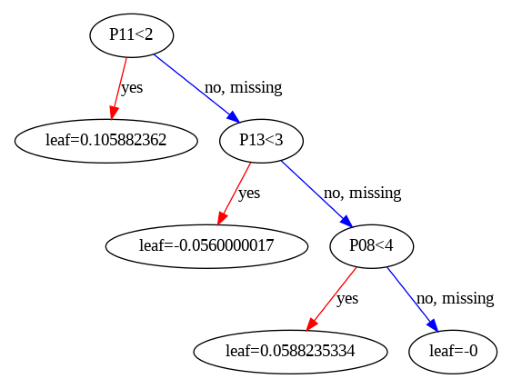

In [ ]:
plot_tree(model, num_trees=3)

In [ ]:
import xgboost as xgb

tree_to_analyze = 0
tree_stats = model.get_booster().get_dump(fmap='', with_stats=True)[tree_to_analyze]
for line in tree_stats.split('\n'):
    if "leaf" in line:
        leaf_value = float(line.split("leaf=")[1].split(",")[0])
        print("Probabilidade na folha:", leaf_value)


Probabilidade na folha: 0.105882362
Probabilidade na folha: -0.0
Probabilidade na folha: -0.0571428612
Probabilidade na folha: -0.00869565271
Probabilidade na folha: 0.105882362


In [ ]:
dump_list = model.get_booster().get_dump()
num_trees = len(dump_list)

In [ ]:
num_trees

400

### Avaliando

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_val)
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)

# Além disso, você pode imprimir um relatório de classificação:
print(classification_report(y_val, y_pred))


[[ 1  2  0  1]
 [ 1 11  1  1]
 [ 2  0 12  1]
 [ 0  1  2 11]]
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.79      0.79      0.79        14
           2       0.80      0.80      0.80        15
           3       0.79      0.79      0.79        14

    accuracy                           0.74        47
   macro avg       0.66      0.66      0.66        47
weighted avg       0.74      0.74      0.74        47



### Análises

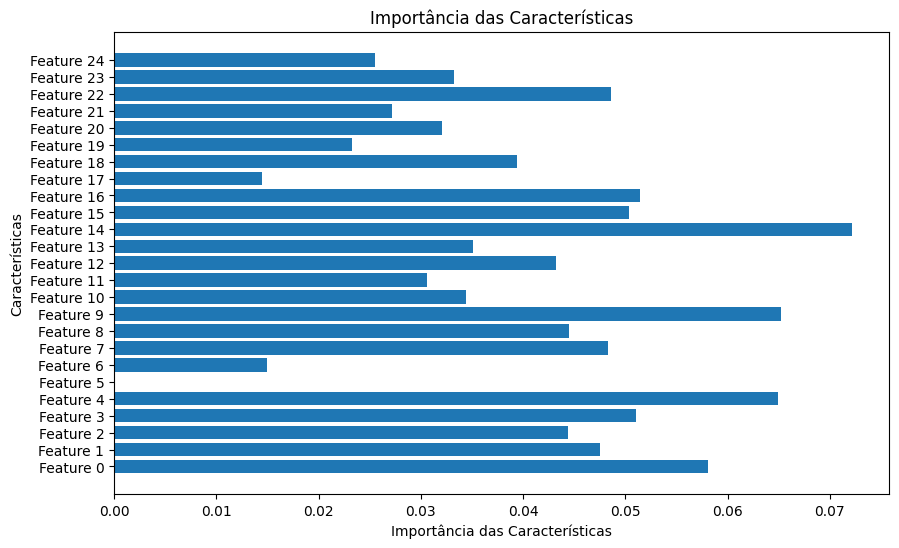

In [ ]:
importances = model.feature_importances_

# Obtenha nomes das características (substitua com os nomes reais das suas características)
feature_names = [f'Feature {i}' for i in range(len(importances))]

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importância das Características')
plt.ylabel('Características')
plt.title('Importância das Características')
plt.show()

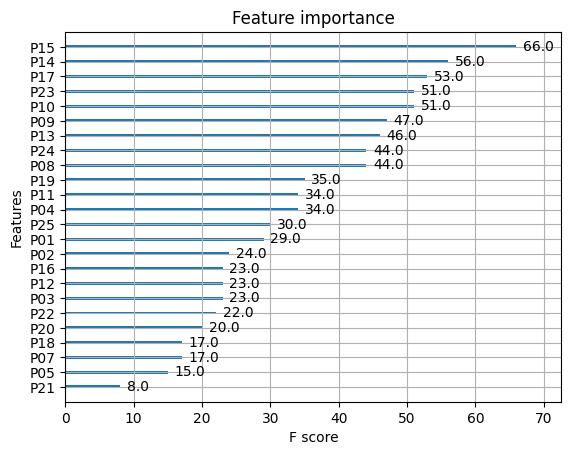

In [ ]:
xgb.plot_importance(model)
plt.show()